In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Mumbai House Prices.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bhk         76038 non-null  int64  
 1   type        76038 non-null  object 
 2   locality    76038 non-null  object 
 3   area        76038 non-null  int64  
 4   price       76038 non-null  float64
 5   price_unit  76038 non-null  object 
 6   region      76038 non-null  object 
 7   status      76038 non-null  object 
 8   age         76038 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.2+ MB


In [4]:
data.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [5]:
data.describe()

,bhk,area,price
count,76038.000000,76038.000000,76038.00000
mean,2.015111,1024.536850,29.38227
std,0.922754,670.276165,32.90345
min,1.000000,127.000000,1.00000
25%,1.000000,640.000000,1.75000
50%,2.000000,872.000000,5.50000
75%,3.000000,1179.000000,59.00000
max,10.000000,16000.000000,99.99000


In [6]:
data.isnull().sum()

bhk           0
type          0
locality      0
area          0
price         0
price_unit    0
region        0
status        0
age           0
dtype: int64

In [7]:
for column in data.columns:
    print(data[column].value_counts())

2     31429
1     24613
3     15273
4      3934
5       606
6       148
7        16
8         8
10        6
9         5
Name: bhk, dtype: int64
Apartment            74854
Studio Apartment       882
Villa                  226
Independent House       73
Penthouse                3
Name: type, dtype: int64
Hiranandani Meadows                    861
Sheth Avalon                           516
T Bhimjyani The Verraton               499
ACME Ozone Phase 2                     467
Runwal Gardens                         389
                                      ... 
HP Anton CHSL Rishab Anton               1
Reputed Builder Shankar Heritage         1
Reputed Builder Aishwarya Apartment      1
Reputed Builder Vinit Tower              1
Hubtown Serene                           1
Name: locality, Length: 9782, dtype: int64
650     1662
1050    1381
1100    1151
1650    1041
750      950
        ... 
2369       1
1945       1
1442       1
2672       1
3049       1
Name: area, Length: 2331, dtype: int6

In [8]:
#convert price crore to lakh 
convert_crore_to_lakh = 100    # 1 crore = 100 lakh
def convert_to_lakhs(row):
    if row["price_unit"]=="L":
        return row["price"]
    elif row["price_unit"]=="Cr":
        return row["price"]*convert_crore_to_lakh

In [9]:
data["price_lakh"]=data.apply(convert_to_lakhs,axis=1)

In [10]:
data.head()

,bhk,type,locality,area,price,price_unit,region,status,age,price_lakh
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New,250.00
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New,52.51
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New,173.00
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New,59.98
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New,94.11


In [11]:
data = data.drop(['locality','price','price_unit','status','age'],axis=1)

In [12]:
data.head()

,bhk,type,area,region,price_lakh
0,3,Apartment,685,Andheri West,250.00
1,2,Apartment,640,Naigaon East,52.51
2,2,Apartment,610,Borivali West,173.00
3,2,Apartment,876,Panvel,59.98
4,2,Apartment,659,Mira Road East,94.11


In [13]:
data['type'].value_counts()

Apartment            74854
Studio Apartment       882
Villa                  226
Independent House       73
Penthouse                3
Name: type, dtype: int64

In [14]:
data['region'].value_counts()

Thane West         14868
Mira Road East      9902
Dombivali           3041
Kandivali East      2568
Kharghar            2362
                   ...  
Police Colony          1
GTB Nagar              1
Bandra                 1
Sector 14 Vashi        1
Goregaon               1
Name: region, Length: 228, dtype: int64

In [15]:
data['region']=data['region'].apply(lambda x: x.strip())
region_count = data['region'].value_counts()

In [16]:
region_count

Thane West         14868
Mira Road East      9902
Dombivali           3041
Kandivali East      2568
Kharghar            2362
                   ...  
Police Colony          1
GTB Nagar              1
Bandra                 1
Sector 14 Vashi        1
Goregaon               1
Name: region, Length: 228, dtype: int64

In [17]:
region_count_less_10 = region_count[region_count<=10]
region_count_less_10

Kanjurmarg East      10
Vasind               10
Sector 20 Kamothe    10
Koproli              10
Cuffe Parade          9
                     ..
Police Colony         1
GTB Nagar             1
Bandra                1
Sector 14 Vashi       1
Goregaon              1
Name: region, Length: 114, dtype: int64

In [18]:
data['region']=data['region'].apply(lambda x:'other' if x in region_count_less_10 else x)

In [19]:
data['region'].value_counts()

Thane West           14868
Mira Road East        9902
Dombivali             3041
Kandivali East        2568
Kharghar              2362
                     ...  
Sector 21 Kamothe       16
Kalwa                   15
Nalasopara East         15
Vangani                 13
Saphale                 12
Name: region, Length: 115, dtype: int64

In [20]:
data['price_per_sqft']=data['price_lakh']*100000/data['area']

In [21]:
data.describe()

,bhk,area,price_lakh,price_per_sqft
count,76038.000000,76038.000000,76038.000000,76038.000000
mean,2.015111,1024.536850,168.417795,15118.812074
std,0.922754,670.276165,217.665511,9332.899565
min,1.000000,127.000000,4.490000,646.766169
25%,1.000000,640.000000,64.000000,8571.428571
50%,2.000000,872.000000,110.000000,13000.000000
75%,3.000000,1179.000000,194.000000,19496.115827
max,10.000000,16000.000000,6000.000000,182307.692308


In [22]:
def rmv_out_sqft(df):
    df_output = pd.DataFrame()
    for key,subdf in df.groupby('region'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        
        gen_df =subdf[(subdf.price_per_sqft>(m-std))&(subdf.price_per_sqft<(m+std))]
        df_output = pd.concat([df_output,gen_df],ignore_index=True)
    return df_output

In [23]:
data = rmv_out_sqft(data)
data.describe()

,bhk,area,price_lakh,price_per_sqft
count,57406.000000,57406.000000,57406.000000,57406.000000
mean,1.992161,1030.850381,156.741405,14215.289653
std,0.901145,639.866479,179.275851,8060.050256
min,1.000000,150.000000,9.000000,2416.666667
25%,1.000000,650.000000,64.100000,8341.750842
50%,2.000000,900.000000,109.000000,12380.952381
75%,3.000000,1187.000000,188.000000,18333.333333
max,10.000000,16000.000000,5555.000000,67307.692308


In [26]:
column_name = ['bhk', 'area', 'price_lakh',"price_per_sqft"]

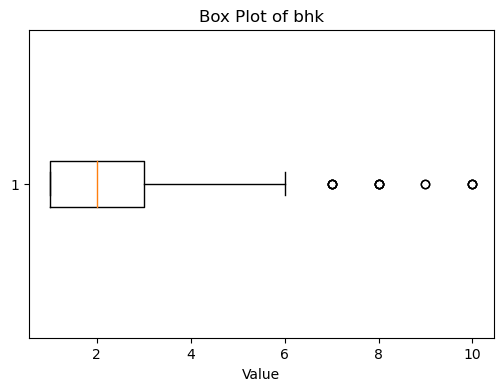

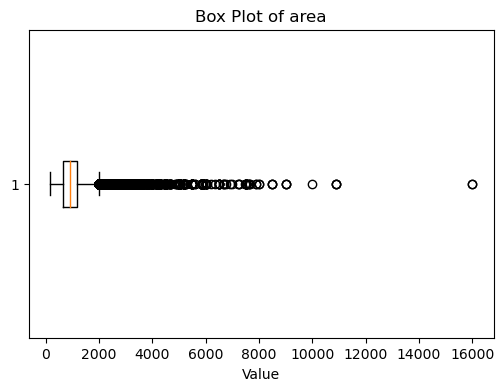

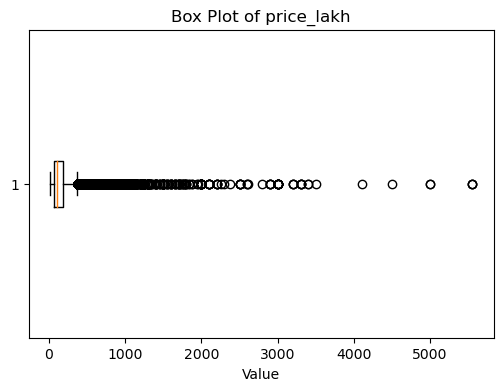

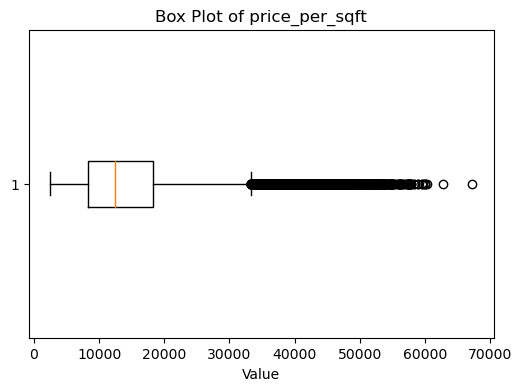

In [27]:
for column in column_name :
    plt.figure(figsize=(6, 4))
    plt.boxplot(data[column], vert=False, boxprops=dict())
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Value')
    plt.show()